In [1]:
import matplotlib.pyplot as plt
import skimage
from skimage import io, data
from skimage.exposure import histogram
from skimage.color import rgb2gray
from google.colab import files

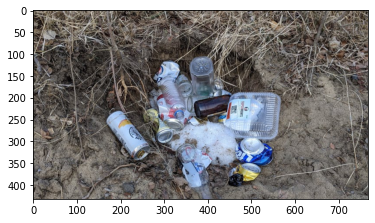

In [2]:
img = skimage.io.imread("/content/drive/MyDrive/GIS 5050/Miniproject/STLTrash.jpg")
fig = plt.imshow(img)
plt.show()

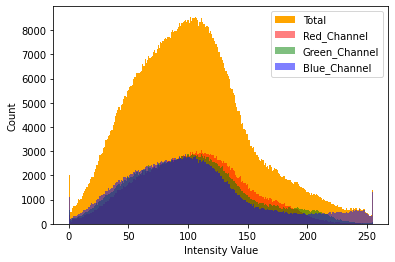

In [3]:
plt.hist(img.ravel(), bins = 256, color = 'orange', )
plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

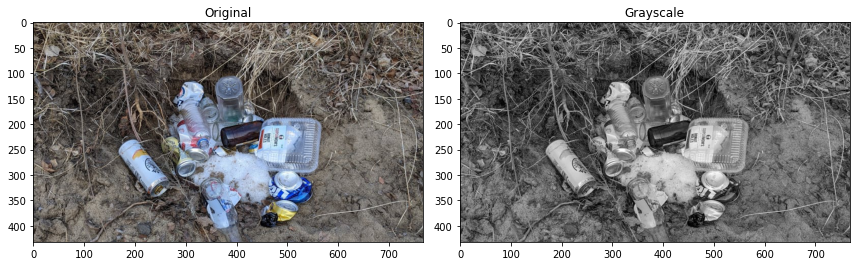

In [4]:
gscale = rgb2gray(img)

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gscale, cmap = plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

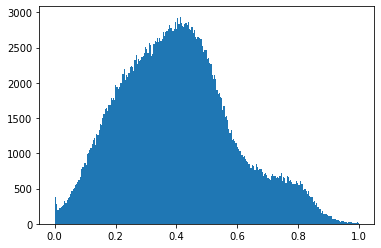

In [5]:
ax2 = plt.hist(gscale.ravel(), bins = 256)
plt.show()

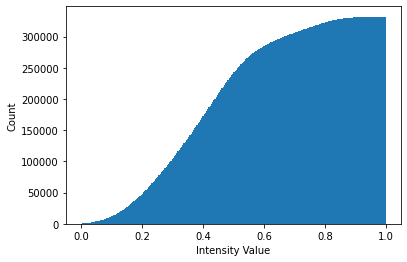

In [6]:
plt.hist(gscale.ravel(), bins = 256, cumulative = True)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.show()

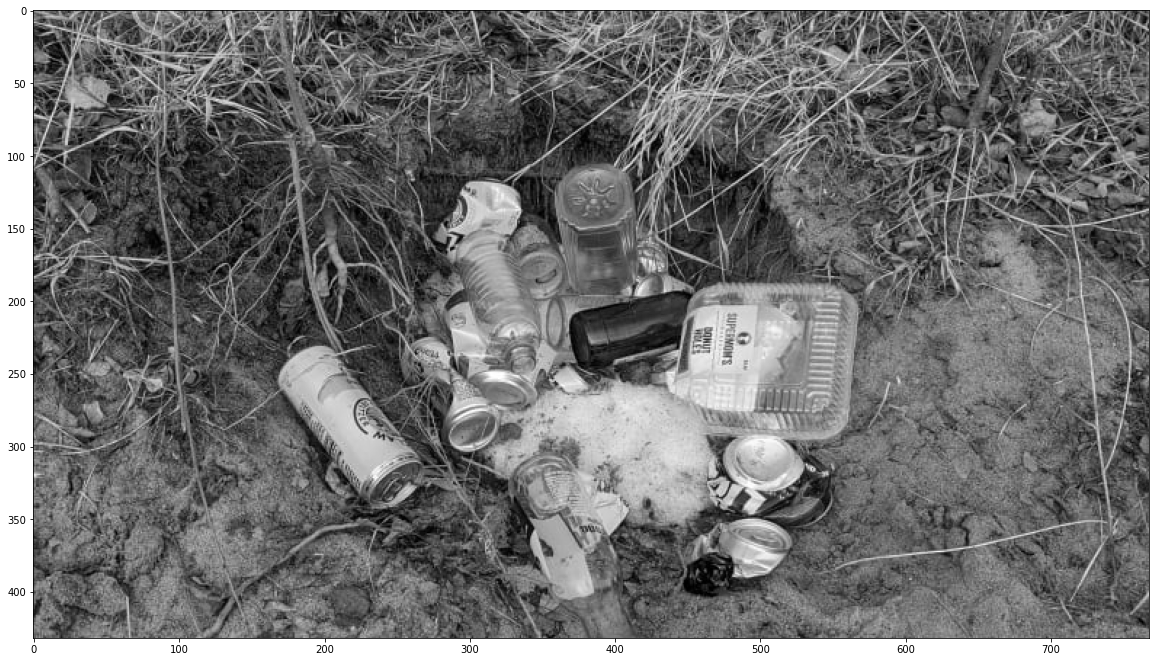

In [7]:
plt.figure(figsize = (20, 20))
plt.imshow(gscale, cmap = plt.cm.gray)

In [8]:
print("RGB Values = ", str(img[10, 10]))

print("Grayscale Value = ", str(gscale[10, 10]))

RGB Values =  [224 215 200]
Grayscale Value =  0.8463960784313725


0.8463960784313725


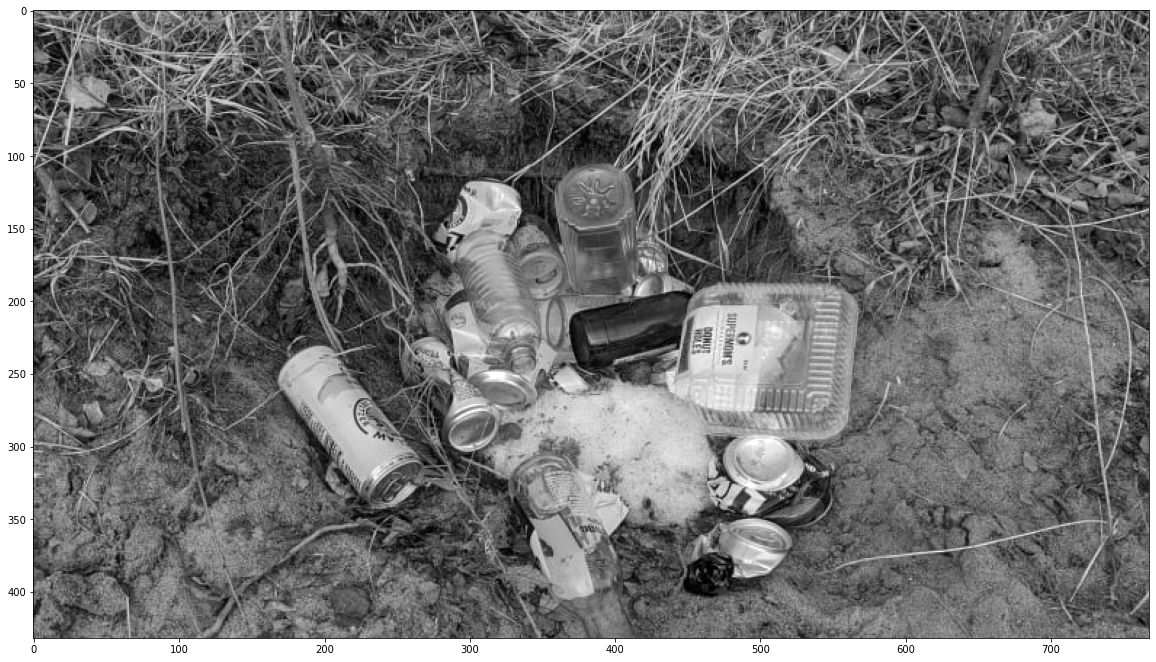

In [9]:
mask = gscale > 0.95
gscale[mask] = 1
print(str(gscale[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale, cmap = 'gray')

In [10]:
import numpy as np
import matplotlib

from skimage import data, img_as_float
from skimage import exposure

In [11]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(gscale)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'black')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
<ipython-input-12-bda8103185d3>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)


<function matplotlib.pyplot.show(close=None, block=None)>

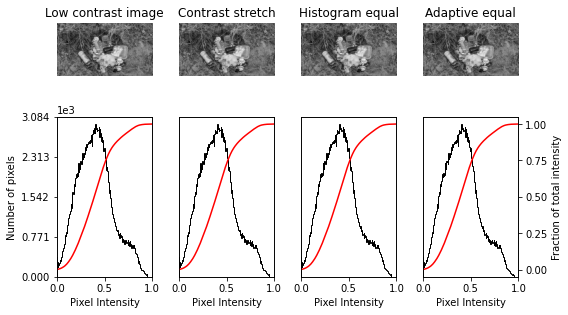

In [12]:
p2, p98 = np.percentile(gscale, (2, 98))
img_rescale = exposure.rescale_intensity(gscale, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(gscale, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gscale, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


In [13]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(img)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'black')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

<ipython-input-14-a6fca9f2e37a>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)


<function matplotlib.pyplot.show(close=None, block=None)>

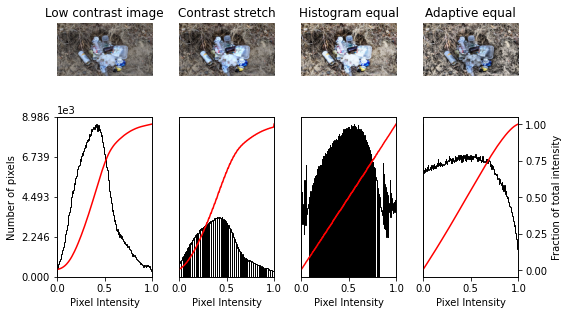

In [14]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(img, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


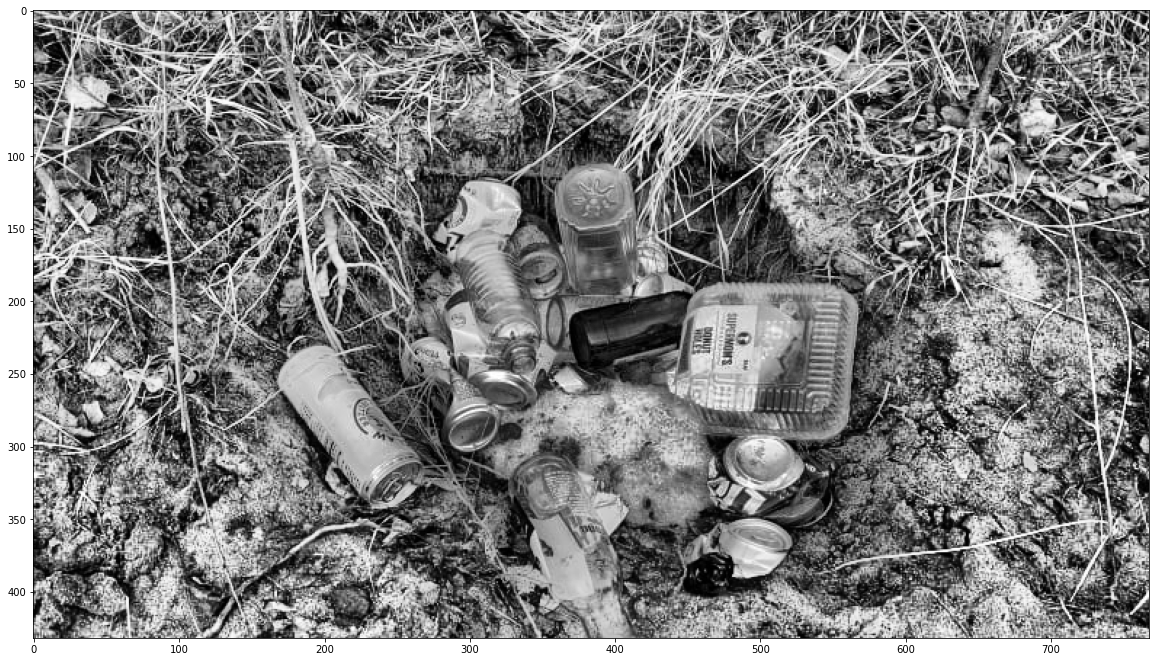

In [15]:
gscale_adptEQ = rgb2gray(img_adapteq)

plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

1.0


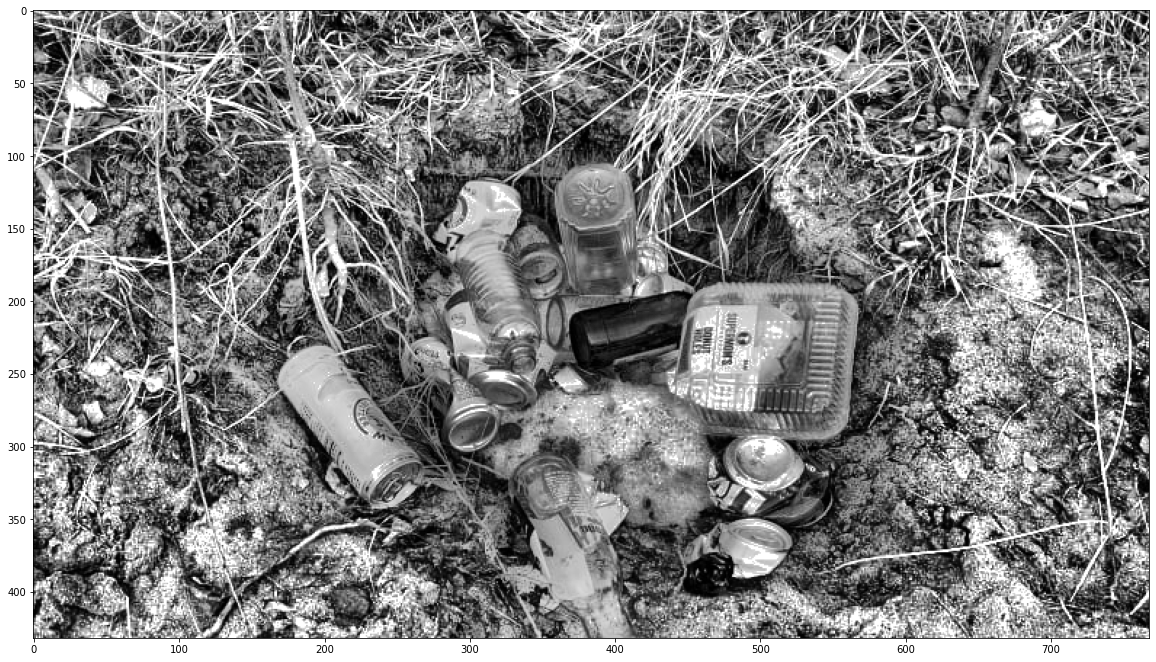

In [16]:
mask = gscale_adptEQ > 0.85
gscale_adptEQ[mask] = 1
print(str(gscale_adptEQ[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

#Match Template

In [17]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage.feature import peak_local_max

In [18]:
image = img
litter = image[160:300, 225:330]

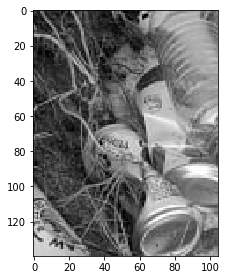

In [19]:
litter = rgb2gray(litter)
imshow(litter)

In [20]:
result = match_template(gscale, litter)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

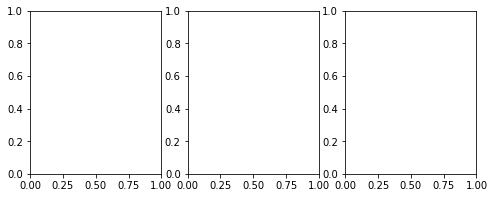

In [21]:
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

In [22]:
ax1.imshow(litter, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

Text(0.5, 1.0, 'template')

In [23]:
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
hcoin, wcoin = litter.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

In [24]:
ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

#Edge Detection

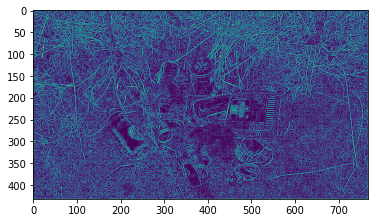

In [41]:
from PIL import Image, ImageFilter
 
 
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"/content/drive/MyDrive/GIS 5050/Miniproject/STLTrash.jpg")
 
# Converting the image to grayscale, as edge detection
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
 
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
 
plt.imshow(image)
plt.show()

#Get Image Coordinates

In [46]:
pip install exif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from exif import Image

def decimal_coords(coords, ref):
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600
    if ref == "S" or ref =='W' :
        decimal_degrees = -decimal_degrees
    return decimal_degrees

def image_coordinates(image_path):

    with open(image_path, 'rb') as src:
        img = Image(src)
    if img.has_exif:
        try:
            img.gps_longitude
            coords = (decimal_coords(img.gps_latitude,
                      img.gps_latitude_ref),
                      decimal_coords(img.gps_longitude,
                      img.gps_longitude_ref))
        except AttributeError:
            print ('No Coordinates')
    else:
        print ('The Image has no EXIF information')
        
    #return({"imageTakenTime":img.datetime_original, "geolocation_lat":coords[0],"geolocation_lng":coords[1]})

image_coordinates(r"/content/drive/MyDrive/GIS 5050/Miniproject/STLTrash3.jpg")


The Image has no EXIF information
